# Đồ án thực hành 1 - Regression

Nhóm 16:

18120647 -	Lê Thanh Viễn	
18120363 -	Đặng Văn Hiển	
18120526 -	Ngô Đăng Quang	
18120527 -	Nguyễn Đăng Quang

# Import

In [1]:
# import thư viện hỗ trợ ma trận đa chiều và dataframe
import numpy as np
import pandas as pd

# import thư viện hỗ trợ trực quan hoá dữ liệu
import seaborn as sns
import matplotlib.pyplot as plt

# import thư viện hỗ trợ học máy miễn phí
# Hàm chia tập train, test ngẫu nhiên
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import OneHotEncoder, StandardScaler
# Hàm hồi quy tuyến tính
from sklearn.linear_model import LinearRegression
# Hàm Multi-layer Perceptron regressor
from sklearn.neural_network import MLPRegressor
import statsmodels.api as sm 

import warnings
warnings.filterwarnings('ignore')

---

# Đọc file và thống kê dữ liệu

In [2]:
# Đọc dữ liệu từ file
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [3]:
# Kiểm tra dữ liệu đã đọc
df_train.head()

,age,sex,bmi,children,smoker,region,charges
0,24,male,23.655,0,no,northwest,2352.96845
1,28,female,26.510,2,no,southeast,4340.44090
2,51,male,39.700,1,no,southwest,9391.34600
3,47,male,36.080,1,yes,southeast,42211.13820
4,46,female,28.900,2,no,southwest,8823.27900


In [4]:
df_test.head()

,age,sex,bmi,children,smoker,region,charges
0,45,female,25.175,2,no,northeast,9095.06825
1,36,female,30.020,0,no,northwest,5272.17580
2,64,female,26.885,0,yes,northwest,29330.98315
3,46,male,25.745,3,no,northwest,9301.89355
4,19,male,31.920,0,yes,northwest,33750.29180


In [5]:
# Kiểm tra có giá trị null không của tập train và test(đếm số giá trị null) 
df_train.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
df_test.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
# Kiểm tra các kiểu dữ liệu của dataframe có phù hợp tính toán chưa
df_train.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [8]:
df_test.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [9]:
# Xét các đại lượng thống kê 
df_train.describe(include ="all")

,age,sex,bmi,children,smoker,region,charges
count,1003.000000,1003,1003.000000,1003.000000,1003,1003,1003.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,506,NaN,NaN,797,259,NaN
mean,39.255234,NaN,30.511780,1.104686,NaN,NaN,13267.935817
std,14.039105,NaN,6.013107,1.204619,NaN,NaN,12051.356547
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.210000,0.000000,NaN,NaN,4780.839400
50%,39.000000,NaN,30.200000,1.000000,NaN,NaN,9447.382400
75%,51.000000,NaN,34.430000,2.000000,NaN,NaN,16840.667970


---

# Trực quan hoá và phân tích dữ liệu 

## 1. Biểu đồ tần suất các trường dữ liệu

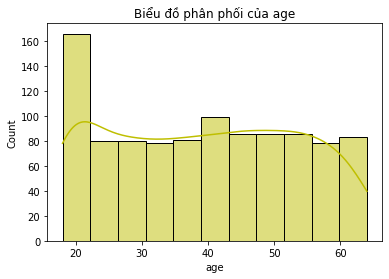

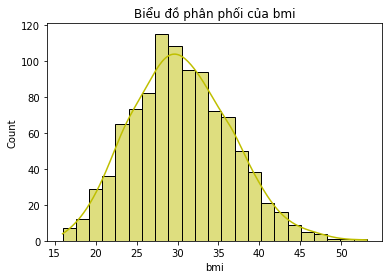

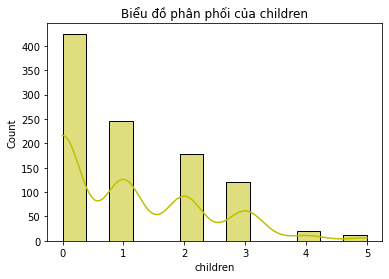

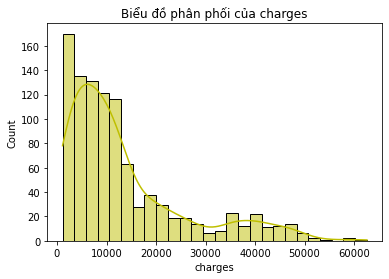

In [10]:
# Trực quan hóa phân bố dữ liệu chi phí y tế
for column in df_train.columns:
  if df_train[column].dtypes == np.object:
    continue
 #plt.figure()            
  plt.title('Biểu đồ phân phối của ' + column)
  sns.histplot(df_train[column], kde = True, color='y')
  plt.show()


## 2. Tương quan giữa các trường dữ liệu

#### Tương quan giữa các trường loại Numerical

<AxesSubplot:>

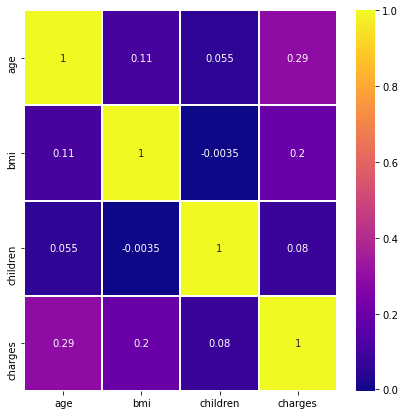

In [11]:
plt.subplots(figsize=(7, 7))
sns.heatmap(df_train.corr(), annot=True, cmap='plasma', linewidths=1)

<AxesSubplot:xlabel='age', ylabel='charges'>

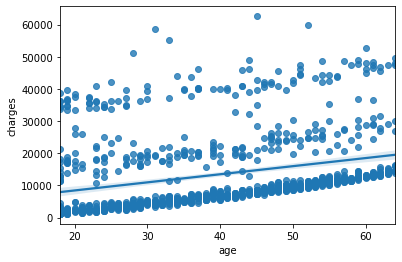

In [12]:
# Biểu đồ hồi quy tuyến tính thể hiện mối tương quan giữa 2 trường dữ liệu age và charges
sns.regplot(x=df_train['age'],y=df_train['charges'])

*Nhận xét: `Độ tuổi` càng cao thì `chi phí y tế` cũng tăng theo.*



<AxesSubplot:xlabel='bmi', ylabel='charges'>

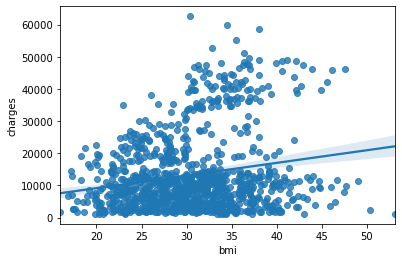

In [13]:
# Biểu đồ hồi quy tuyến tính thể hiện mối tương quan giữa 2 trường dữ liệu bmi và charges
sns.regplot(x=df_train['bmi'],y=df_train['charges'])

*Nhận xét: `Chi số BMI` càng cao thì `chi phí y tế` cũng tăng theo.*

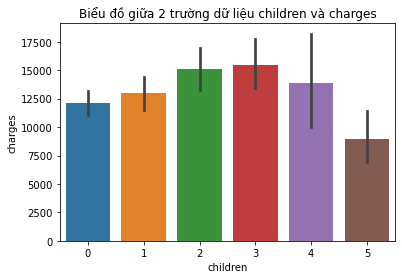

In [14]:
# Biểu đồ giữa 2 trường dữ liệu children và charges
sns.barplot(x=df_train['children'], y=df_train['charges'])
plt.title('Biểu đồ giữa 2 trường dữ liệu children và charges')
plt.show()


*Nhận xét: Chi phí y tế tăng dần khi về 3 - 4 con* 

#### Mối tương quan giữa các thuộc tính Catergorical

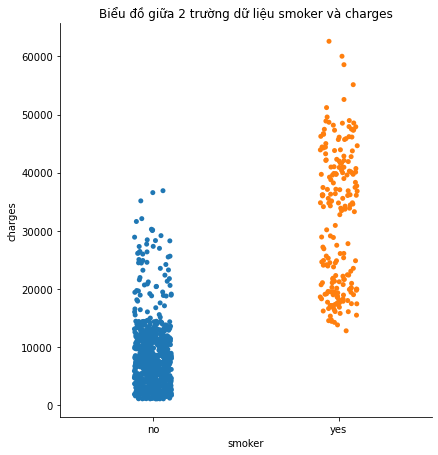

In [15]:
# Biểu đồ giữa 2 trường dữ liệu smoker và charges
sns.catplot(x = 'smoker', y = 'charges',data=df_train, height=6, aspect=1)
plt.title('Biểu đồ giữa 2 trường dữ liệu smoker và charges')
plt.show()


Nhận xét: 
- Hầu hết người không hút thuốc có chi phí y tế thấp.
- Người hút thuốc có chi phí y tế có thể dao động lên rất cao.

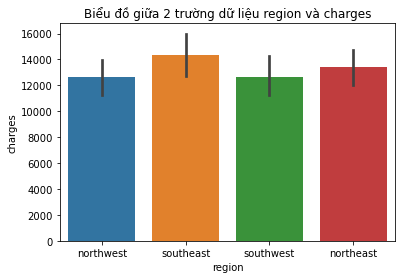

In [16]:
# Biểu đồ giữa 2 trường dữ liệu region và charges
sns.barplot(x=df_train['region'],y = df_train['charges'])
plt.title('Biểu đồ giữa 2 trường dữ liệu region và charges')
plt.show()

*Nhận xét:*

*- Độ chênh lệch giữa các vùng không nhiều.*

*- Những người vùng Đông Nam sẽ có chi phí y tế cao nhất, vùng Tây Bắc thấp nhất.*

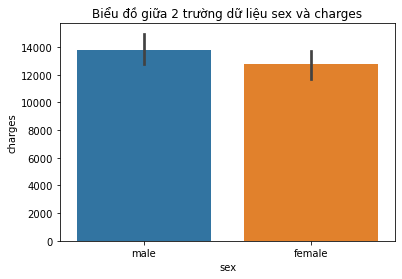

In [17]:
# Biểu đồ giữa 2 trường dữ liệu sex và charges
sns.barplot(x=df_train['sex'],y = df_train['charges'])
plt.title('Biểu đồ giữa 2 trường dữ liệu sex và charges')
plt.show()

*Nhận xét:*

*- Độ chênh lệch chi phí y tế giữa giới tính không nhiều.*

*- Những người nam sẽ có chi phí y tế cao hơn tuy không nhiều.*


# Tiền xử lý dữ liệu

In [18]:
# Lấy trường charges
y_train = df_train["charges"] 
X_train = df_train.drop("charges", axis=1)

In [19]:
# Chuyển kiểu chuỗi chuẩn bị cho One-hot Endcoding
X_train["smoker"] = X_train["smoker"].astype(str)

In [20]:
# Chuẩn hoá dữ liệu với StandardScaler và OneHotEncoder
column_trans =  ColumnTransformer([('standardScaler', StandardScaler(), ['age', 'bmi', 'children']),
                                   ('oneHotEncoder', OneHotEncoder(), ['smoker','sex','region'])])
X_train=column_trans.fit_transform(X_train)

# Cài đặt các thuật toán máy học

- Linear Regression

In [21]:
ln_reg  = LinearRegression()
ln_reg.fit(X_train,y_train)

LinearRegression()

In [22]:
# Dự đoán chi phí y tế cá nhân
y_pred = ln_reg.predict(X_train)

In [23]:
# Các hệ số và hệ số tự do
#['age', 'bmi', 'children', 'smoker','sex','region']
print('Coefficients:    [\'age\', \'bmi\', \'children\', \'smoker\',\'sex\',\'region\'] \n', ln_reg.coef_)  
print('Intercept:        \n', ln_reg.intercept_)

Coefficients:    ['age', 'bmi', 'children', 'smoker','sex','region'] 
 [  3643.06598197   2042.26503648    513.51689408 -11815.19949515
  11815.19949515    -22.81121375     22.81121375    499.19593062
    144.04730929   -282.1724583    -361.07078161]
Intercept:        
 20231.15708732415


In [24]:
# Mean Squared Error
def MSE(y, y_pred):
  return ((y_pred -y) ** 2).mean()

# R-squared Score
def R2(y, y_pred):
  SSres = MSE(y, y_pred)
  SStot = MSE(y, y.mean())
  return 1 - SSres / SStot


In [25]:
# Điểm R squared Linear Regression
R2_score = R2(y_train,y_pred)
print(f"R squared: {R2_score}")

R squared: 0.7449555328228532


- Neural Network

In [26]:
# Tạo tập Training và validation
train_X, val_X, train_y, val_y = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [27]:
mlp_reg = MLPRegressor(solver = "lbfgs", random_state=0, max_iter=500 )

val_errs = []
alphas = [0.00001, 0.0001, 0.001]
hidden_layer_sizes = [(20,),(20,2), (15,), (15,2), (10,), (10,2),(5,), (5,2)]
max_score = 0; 
best_alpha = None; 
best_hidden_layer_sizes = None
for alpha in alphas:
    for hidden_layer_size in hidden_layer_sizes:
        mlp_reg.set_params(hidden_layer_sizes = hidden_layer_size, alpha = alpha)
        mlp_reg.fit(train_X, train_y)
        val_score = mlp_reg.score(val_X, val_y)
        if float(val_score) > max_score:
            max_score = val_score
            best_alpha = alpha
            best_hidden_layer_sizes = hidden_layer_size

In [28]:
mlp_reg.set_params(hidden_layer_sizes = best_hidden_layer_sizes, alpha = best_alpha)
mlp_reg.fit(train_X, train_y)


MLPRegressor(alpha=0.001, hidden_layer_sizes=(5,), max_iter=500, random_state=0,
             solver='lbfgs')

# Test Model

In [29]:
# Tiền xử lý dữ liệu cho test
y_test = df_test["charges"]
X_test = df_test.drop("charges", axis=1)
X_test=column_trans.fit_transform(X_test)

In [30]:
# hàm vẽ tương quan giữa giá trị dự đoán và giá trị test
def PlotPredvsActual(y_pred,y_test):
  x = np.linspace(-1000, 50000, 1000)
  plt.figure(figsize=(12,8))
  plt.scatter(y_pred, y_test)
  plt.title('Scatter plot prediction on train and test data')
  plt.xlabel('Predicted values')
  plt.ylabel('Actual values')
  plt.legend(loc = 'upper right')
  plt.grid()
  sns.regplot(x=y_pred,y=y_test)
  # Đường thẳng y_test = y_pred
  plt.plot(x, x, 'r--');
  plt.show()

- Linear Regression

In [31]:
# Nạp dữ liệu và chạy model
ln_reg.fit(X_test,y_test)
y_pred = ln_reg.predict(X_test)
# Điểm R squared Linear Regression
R2_score = R2(y_test,y_pred)
print(f"R squared: {R2_score}")

R squared: 0.7705574652340885


No handles with labels found to put in legend.


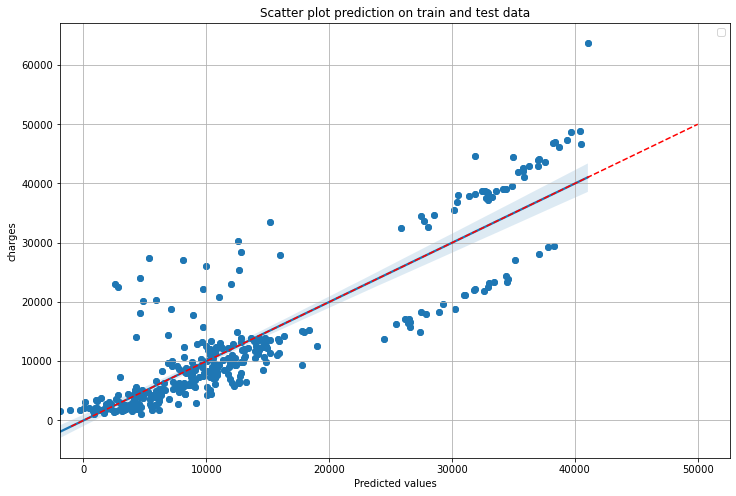

In [32]:
# Biểu đồ tương quan giữa giá trị dự đoán và giá trị test
PlotPredvsActual(y_pred,y_test)

- Neural network

In [33]:
# Nạp dữ liệu và chạy model
mlp_reg.fit(X_test, y_test)
y_pred = ln_reg.predict(X_test)
# Điểm R squared Neural network
print(f"R squared: {mlp_reg.score(X_test, y_test)}")

R squared: 0.871887606241352


No handles with labels found to put in legend.


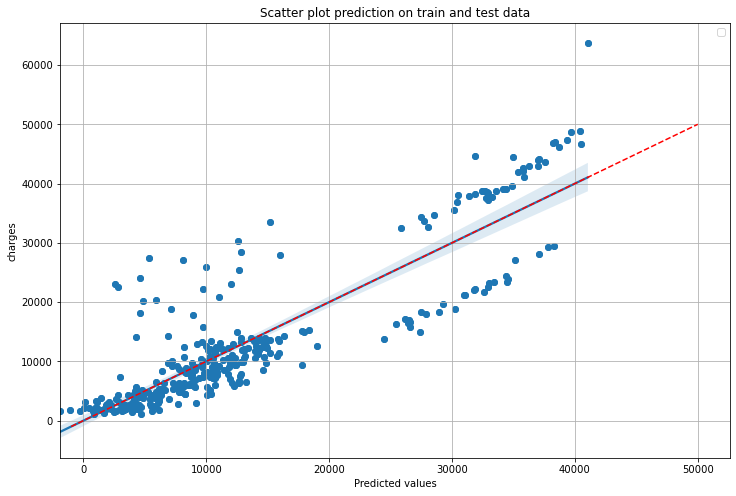

In [34]:
# Biểu đồ tương quan giữa giá trị dự đoán và giá trị test
PlotPredvsActual(y_pred,y_test)

# Nhận xét


In [35]:

# statsmodel
x2 = sm.add_constant(X_test)
models = sm.OLS(y_test,x2)
result = models.fit()
print (result.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     136.9
Date:                Fri, 14 May 2021   Prob (F-statistic):           2.12e-99
Time:                        07:12:11   Log-Likelihood:                -3383.1
No. Observations:                 335   AIC:                             6784.
Df Residuals:                     326   BIC:                             6819.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9198.2174    184.466     49.864      0.0

In [36]:
x2.shape

(335, 12)